<a href="https://colab.research.google.com/github/anudeepsekhar/Data-Science-Explorations/blob/master/Cassification_With_Class_Imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
%pwd
%cd drive/My\ Drive/data\ science/project1

[Errno 2] No such file or directory: 'drive/My Drive/data science/project1'
/content/drive/My Drive/data science/project1


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [0]:
df = pd.read_csv('synthetic.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc07576dcc0>]],
      dtype=object)

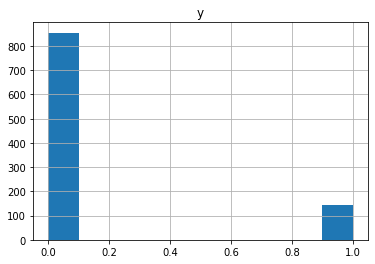

In [39]:
df.hist('y')

In [40]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,y
0,-14.698830,2.369710,1.089267,-1.262030,-15.650082,-16.665997,15.909853,-11.121045,18.275820,-2.405075,39.351968,1.531488,15.430069,16.915395,33.956933,-3.782350,-12.911483,54.441825,-2.884946,8.236905,3.394184,-5.421817,15.233291,-3.484405,2.755223,9.766386,6.419560,6.618973,15.171849,1.926773,1
1,-8.457451,2.182712,0.972360,-4.255289,-11.524392,-4.843399,9.557964,-10.145921,6.655710,-2.821156,10.796796,1.205652,23.411830,6.121666,6.909948,1.870118,-10.385600,28.779037,-5.958564,-7.513426,6.394517,-5.398857,20.342647,-5.395054,2.816668,14.932127,9.134028,4.826775,12.077634,3.397375,0
2,-6.541517,1.263892,-0.494469,-2.562072,-8.979410,-23.632245,15.740920,-4.460916,-16.528412,-3.901285,8.287965,-0.626097,2.678985,2.945680,-1.349470,5.217141,-13.182974,4.052341,0.272782,-7.689550,-4.819011,-5.339781,10.859401,-2.095555,2.945595,14.778588,2.711564,-0.090958,-5.467509,3.088641,0
3,-18.139840,1.569545,-3.286717,-4.255045,-16.146687,-25.893126,12.005963,-2.228017,5.853151,-2.951831,-2.399183,-2.397347,10.617415,21.014200,38.767072,-9.855020,-14.581631,27.477076,5.910236,13.351203,-5.795252,-5.652446,-8.674892,-9.665123,8.876766,22.335086,10.194627,2.720710,-1.787331,-0.291131,0
4,-12.500957,2.313632,5.227138,2.586718,-15.022213,-3.105726,18.070314,-7.745197,0.300133,-3.364458,34.566735,-1.298094,23.715586,8.258894,-11.067658,-18.110056,-11.215811,-17.987886,1.365943,-17.533495,-0.966188,-5.551594,13.195368,-5.089818,12.362742,22.624796,4.407471,3.022274,-1.705888,6.650217,0


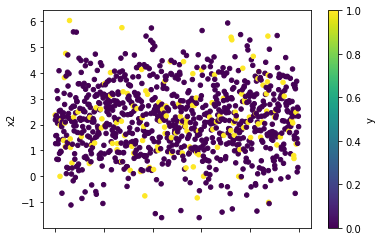

In [41]:
df.reset_index().plot.scatter('index','x2',c='y', colormap='viridis')

In [0]:
X = df.drop(columns='y')
y = df.y

In [43]:
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,-14.698830,2.369710,1.089267,-1.262030,-15.650082,-16.665997,15.909853,-11.121045,18.275820,-2.405075,39.351968,1.531488,15.430069,16.915395,33.956933,-3.782350,-12.911483,54.441825,-2.884946,8.236905,3.394184,-5.421817,15.233291,-3.484405,2.755223,9.766386,6.419560,6.618973,15.171849,1.926773
1,-8.457451,2.182712,0.972360,-4.255289,-11.524392,-4.843399,9.557964,-10.145921,6.655710,-2.821156,10.796796,1.205652,23.411830,6.121666,6.909948,1.870118,-10.385600,28.779037,-5.958564,-7.513426,6.394517,-5.398857,20.342647,-5.395054,2.816668,14.932127,9.134028,4.826775,12.077634,3.397375
2,-6.541517,1.263892,-0.494469,-2.562072,-8.979410,-23.632245,15.740920,-4.460916,-16.528412,-3.901285,8.287965,-0.626097,2.678985,2.945680,-1.349470,5.217141,-13.182974,4.052341,0.272782,-7.689550,-4.819011,-5.339781,10.859401,-2.095555,2.945595,14.778588,2.711564,-0.090958,-5.467509,3.088641
3,-18.139840,1.569545,-3.286717,-4.255045,-16.146687,-25.893126,12.005963,-2.228017,5.853151,-2.951831,-2.399183,-2.397347,10.617415,21.014200,38.767072,-9.855020,-14.581631,27.477076,5.910236,13.351203,-5.795252,-5.652446,-8.674892,-9.665123,8.876766,22.335086,10.194627,2.720710,-1.787331,-0.291131
4,-12.500957,2.313632,5.227138,2.586718,-15.022213,-3.105726,18.070314,-7.745197,0.300133,-3.364458,34.566735,-1.298094,23.715586,8.258894,-11.067658,-18.110056,-11.215811,-17.987886,1.365943,-17.533495,-0.966188,-5.551594,13.195368,-5.089818,12.362742,22.624796,4.407471,3.022274,-1.705888,6.650217


In [44]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [45]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0755cf6a0>]],
      dtype=object)

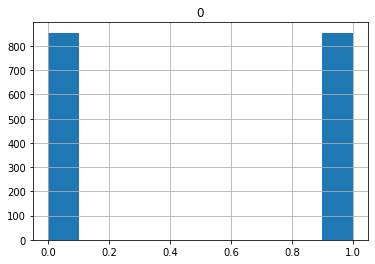

In [46]:
pd.DataFrame(y_sm).hist()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc075634668>]],
      dtype=object)

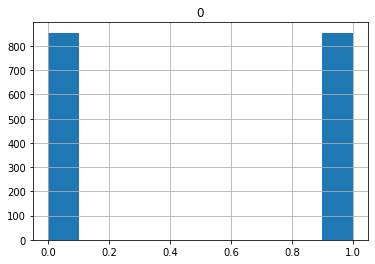

In [47]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

pd.DataFrame(y_smt).hist()

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.2, random_state=3)

In [0]:
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [0]:
classifier_pipeline = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))

In [0]:
scores = cross_val_score(classifier_pipeline, X_train, y_train, cv=10)

In [53]:
scores

array([0.95620438, 0.94160584, 0.94160584, 0.94890511, 0.9270073 ,
       0.89781022, 0.91970803, 0.96350365, 0.88970588, 0.92647059])

In [54]:
scores.mean()

0.931252683555174

In [0]:
clf = RandomForestClassifier(max_depth=20, random_state=3, n_estimators=400,n_jobs=-1)

In [0]:
classifier_pipeline_2 = make_pipeline(preprocessing.StandardScaler(), clf)

In [0]:
scores = cross_val_score(classifier_pipeline_2, X_train, y_train, cv=10)

In [87]:
scores.mean()

0.9371189351653069

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [88]:
classifier_pipeline_2.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=20, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=400, n_jobs=-1,
                                        oob_score=False, random_state=3,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [0]:
y_pred = classifier_pipeline_2.predict(X_test)

In [92]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.96      0.95      0.96       172
     class 1       0.95      0.96      0.96       170

    accuracy                           0.96       342
   macro avg       0.96      0.96      0.96       342
weighted avg       0.96      0.96      0.96       342



In [63]:
confusion_matrix(y_test, y_pred)

array([[160,  12],
       [  5, 165]])

In [64]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(160, 12, 5, 165)